GMV weight in Dell: 0.1698  (IBM: 0.8302)
GMV E[R]: 11.02%   GMV σ: 14.74%

Two-asset frontier points:
 X_D (Dell weight)  E[R_p] (%)  σ(R_p) (%)
              -0.5         7.0       18.34
               0.0        10.0       15.00
               0.5        13.0       15.69
               1.0        16.0       20.00
               1.5        19.0       26.20


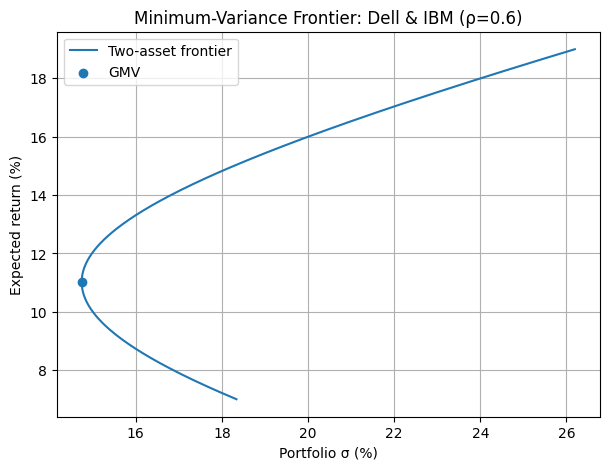

In [2]:
# Minimum-variance frontier for two risky assets (Dell & IBM)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inputs
mu_D, mu_I = 0.16, 0.10
sigma_D, sigma_I = 0.20, 0.15
rho_DI = 0.60

# Covariance matrix
var_D, var_I = sigma_D**2, sigma_I**2
cov_DI = rho_DI * sigma_D * sigma_I

# Parametric weights for Dell (IBM weight = 1 - w)
w = np.linspace(-0.5, 1.5, 301)
mu_p = w * mu_D + (1 - w) * mu_I
var_p = (w**2)*var_D + (1 - w)**2*var_I + 2*w*(1 - w)*cov_DI
sd_p  = np.sqrt(var_p)

# Global minimum-variance (GMV) portfolio
w_gmv = (var_I - cov_DI) / (var_D + var_I - 2*cov_DI)
mu_gmv = w_gmv * mu_D + (1 - w_gmv) * mu_I
sd_gmv = np.sqrt(w_gmv**2*var_D + (1 - w_gmv)**2*var_I + 2*w_gmv*(1 - w_gmv)*cov_DI)

print(f"GMV weight in Dell: {w_gmv:.4f}  (IBM: {1 - w_gmv:.4f})")
print(f"GMV E[R]: {100*mu_gmv:.2f}%   GMV σ: {100*sd_gmv:.2f}%")

# Table at specific weights
w_list = np.array([-0.5, 0.0, 0.5, 1.0, 1.5])
mu_tab = w_list * mu_D + (1 - w_list) * mu_I
sd_tab = np.sqrt((w_list**2)*var_D + (1 - w_list)**2*var_I + 2*w_list*(1 - w_list)*cov_DI)
table = pd.DataFrame({
    "X_D (Dell weight)": w_list,
    "E[R_p] (%)": np.round(100*mu_tab, 2),
    "σ(R_p) (%)": np.round(100*sd_tab, 2),
})
print("\nTwo-asset frontier points:")
print(table.to_string(index=False))

# Plot
plt.figure(figsize=(7,5))
plt.plot(sd_p*100, mu_p*100, label="Two-asset frontier")
plt.scatter(sd_gmv*100, mu_gmv*100, label="GMV", zorder=3)
plt.xlabel("Portfolio σ (%)")
plt.ylabel("Expected return (%)")
plt.title("Minimum-Variance Frontier: Dell & IBM (ρ=0.6)")
plt.legend()
plt.grid(True)
plt.show()


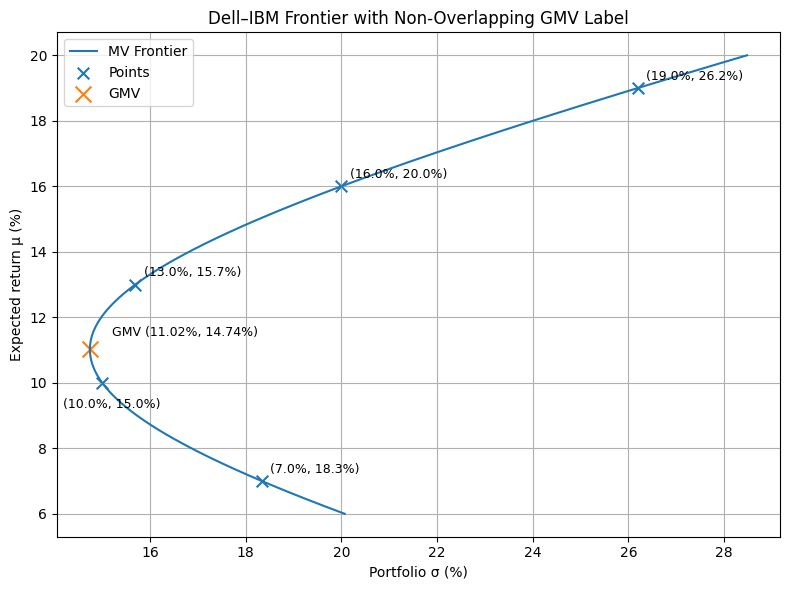

In [8]:
# Re-plot MV frontier with adjusted annotation offsets to avoid overlap between GMV and a nearby point.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inputs
mu = np.array([0.16, 0.10])                       # E = [Dell, IBM]
Sigma = np.array([[0.04, 0.018],
                  [0.018, 0.0225]])               # Covariance
ones = np.ones(2)

# Markowitz scalars
invS = np.linalg.inv(Sigma)
A = float(mu.T @ invS @ mu)
B = float(mu.T @ invS @ ones)
C = float(ones.T @ invS @ ones)
D = A*C - B**2

# GMV
w_gmv = (invS @ ones) / C
mu_gmv = B / C
sd_gmv = np.sqrt(1 / C)

# Five weight points
w_list = np.array([-0.5, 0.0, 0.5, 1.0, 1.5])     # Dell weights
mu_pts = w_list*mu[0] + (1-w_list)*mu[1]
var_pts = (w_list**2)*Sigma[0,0] + (1-w_list)**2*Sigma[1,1] + 2*w_list*(1-w_list)*Sigma[0,1]
sd_pts = np.sqrt(var_pts)

# Frontier via quadratic
mu_grid = np.linspace(min(mu_pts.min(), mu_gmv)-0.01, max(mu_pts.max(), mu_gmv)+0.01, 300)
sd_grid = np.sqrt((C*mu_grid**2 - 2*B*mu_grid + A) / D)

# Plot
plt.figure(figsize=(8,6))
plt.plot(sd_grid*100, mu_grid*100, label="MV Frontier")
plt.scatter(sd_pts*100, mu_pts*100, marker="x", s=70, label="Points")
plt.scatter(sd_gmv*100, mu_gmv*100, marker="x", s=130, label="GMV")

# Annotate each point; nudge the one near GMV
for w, s, m in zip(w_list, sd_pts, mu_pts):
    # default offset
    dx, dy = 6, 6
    # if this is the w=0 point (close to GMV), push the label down-left
    if abs(w) < 1e-12:
        dx, dy = -28, -18
    plt.annotate(f"({m*100:.1f}%, {s*100:.1f}%)",
                 xy=(s*100, m*100), xytext=(dx, dy),
                 textcoords="offset points", fontsize=9)

# Annotate GMV with a different offset away from that point
plt.annotate(f"GMV ({mu_gmv*100:.2f}%, {sd_gmv*100:.2f}%)",
             xy=(sd_gmv*100, mu_gmv*100), xytext=(16, 10),
             textcoords="offset points", fontsize=9)

plt.xlabel("Portfolio σ (%)")
plt.ylabel("Expected return μ (%)")
plt.title("Dell–IBM Frontier with Non-Overlapping GMV Label")
plt.legend()
plt.grid(True)
plt.tight_layout()

# fig_path = "/mnt/data/dell_ibm_frontier_annotated_no_overlap.png"
# plt.savefig(fig_path, dpi=150)
plt.show()

# fig_path


                  Portfolio  μ (expected)  σ (stdev)
  Equal-weight (theory GMV)           0.1   0.074162
Numerical GMV (closed form)           0.1   0.074162
         Best random sample           0.1   0.074395


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/ten_assets_gmv_cloud.png'

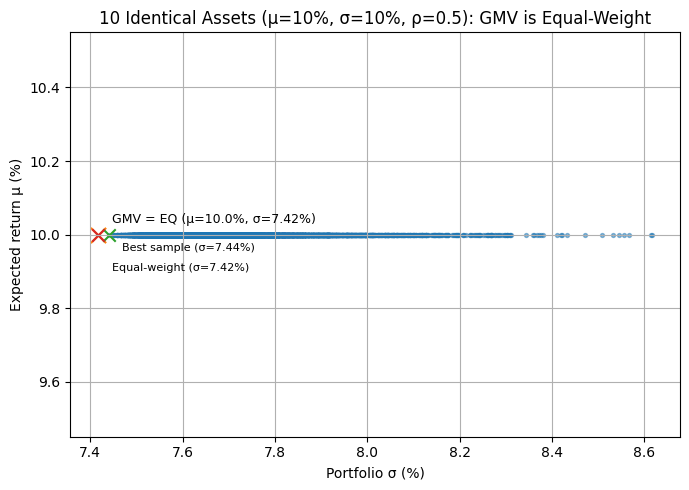

In [9]:
# Demonstrate that equal-weights is GMV for 10 identical assets, and plot the cloud + GMV point.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(7)

# Problem parameters
n = 10
mu = 0.10
sigma = 0.10
rho = 0.5

# Covariance matrix (equicorrelation)
Sigma = sigma**2 * ((1 - rho) * np.eye(n) + rho * np.ones((n, n)))

# GMV (closed form): w_gmv = Σ^{-1}1 / (1'Σ^{-1}1)
invS = np.linalg.inv(Sigma)
ones = np.ones(n)
w_gmv = (invS @ ones) / (ones @ invS @ ones)
mu_gmv = mu  # because all means are identical
sd_gmv = np.sqrt(1 / (ones @ invS @ ones))

# Equal-weight (should match GMV exactly)
w_eq = np.full(n, 1/n)
sd_eq = np.sqrt(w_eq @ Sigma @ w_eq)

# Sample many fully-invested, long-only portfolios and show the cloud sits above GMV
m = 8000
# Dirichlet(1,...,1) gives random weights summing to 1
weights = np.random.dirichlet(np.ones(n), size=m)
mus = weights @ (mu * np.ones(n))
sds = np.sqrt(np.sum(weights @ Sigma * weights, axis=1))  # sqrt of diag(W Σ W'), vectorized

# Find best from samples
idx_min = np.argmin(sds)
w_min = weights[idx_min]
mu_min, sd_min = mus[idx_min], sds[idx_min]

# Print a small summary
summary = pd.DataFrame({
    "Portfolio": ["Equal-weight (theory GMV)", "Numerical GMV (closed form)", "Best random sample"],
    "μ (expected)": [mu, mu_gmv, mu_min],
    "σ (stdev)": [sd_eq, sd_gmv, sd_min]
})
print(summary.to_string(index=False))

# Plot: Risk (x) vs Return (y); all points lie at 10% on y-axis, GMV is the lowest σ
plt.figure(figsize=(7,5))
plt.scatter(sds*100, mus*100, s=8, alpha=0.5)
plt.scatter(sd_gmv*100, mu_gmv*100, marker="x", s=120)
plt.annotate(f"GMV = EQ (μ=10.0%, σ={sd_gmv*100:.2f}%)",
             xy=(sd_gmv*100, mu_gmv*100), xytext=(10,8), textcoords="offset points", fontsize=9)

# Also mark the best random sample and equal-weight point (they should coincide with GMV)
plt.scatter(sd_min*100, mu_min*100, marker="x", s=80)
plt.annotate(f"Best sample (σ={sd_min*100:.2f}%)",
             xy=(sd_min*100, mu_min*100), xytext=(10,-12), textcoords="offset points", fontsize=8)
plt.scatter(sd_eq*100, mu*100, marker="x", s=80)
plt.annotate(f"Equal-weight (σ={sd_eq*100:.2f}%)",
             xy=(sd_eq*100, mu*100), xytext=(10,-26), textcoords="offset points", fontsize=8)

plt.xlabel("Portfolio σ (%)")
plt.ylabel("Expected return μ (%)")
plt.title("10 Identical Assets (μ=10%, σ=10%, ρ=0.5): GMV is Equal-Weight")
plt.grid(True)
plt.tight_layout()
fig_path = "/mnt/data/ten_assets_gmv_cloud.png"
plt.savefig(fig_path, dpi=150)
plt.show()

fig_path
